In [7]:
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def binary_racoon(image, threshold):
    img = np.zeros((len(image[:, 1]), len(image[1, :])), bool)
    for i in range(len(img[:, 1])):
        for j in range(len(img[1, :])): 
            img[i,j] = image[i,j] > threshold
    return img

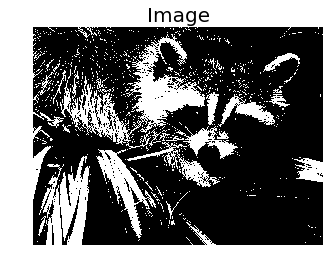

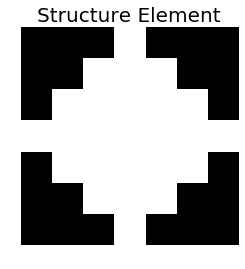

In [8]:
binary_image = binary_racoon(misc.face(gray=True), 160)
plt.imshow(binary_image, cmap=plt.cm.gray)
plt.title('Image', fontsize=20)
plt.axis('off')
plt.show()

radius = 3
struct = ndimage.generate_binary_structure(2, 1)
structure_element = ndimage.iterate_structure(struct, radius).astype(bool)
plt.imshow(structure_element, cmap = plt.cm.gray)
plt.title('Structure Element', fontsize=20)
plt.axis('off')
plt.show()

In [9]:
def create_structs(structure, radius):
    struct_1 = np.full((radius + 1, 2 * radius + 1), False, dtype=bool)
    struct_2 = np.full((radius + 1, 2 * radius + 1), False, dtype=bool)

    for i in range(-radius, radius + 1):
        for j in range(-radius, radius + 1):
            if structure[i + radius][j + radius]:
                if i < 0 or (i == 0 and j <= 0):
                    struct_1[i + radius][j + radius] = True
                else:
                    struct_2[i][j + radius] = True
    struct_1[radius][radius] = False
    return struct_1, struct_2

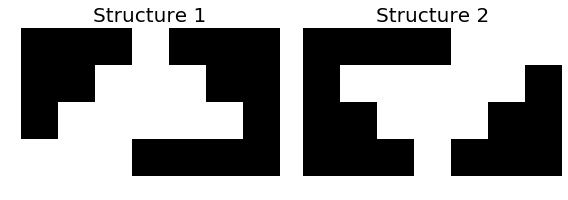

In [10]:
structure_1, structure_2 = create_structs(structure_element, radius)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax1.imshow(structure_1, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Structure 1', fontsize=20)

ax2.imshow(structure_2, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Structure 2', fontsize=20)

fig.tight_layout()
plt.show()

In [11]:
def create_distance_function(img, struct_1, struct_2, radius):
    d_1 = np.zeros((binary_image.shape[0] + 2 * radius, binary_image.shape[1] + 2 * radius), dtype=int)
    d_2 = np.zeros((binary_image.shape[0] + 2 * radius, binary_image.shape[1] + 2 * radius), dtype=int)
    
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            if img[i][j]:
                minimum = 10000000
                for l in range(0, len(struct_1)):
                    for k in range(0, len(struct_1[0])):
                        if struct_1[l][k] and d_1[i + l][j + k] < minimum:
                            minimum = d_1[i + l][j + k]
                d_1[i + radius][j + radius] = minimum + 1
            else:
                d_1[i + radius][j + radius] = 0
                
    for i in range(img.shape[0] - 1, -1, -1):
        for j in range(img.shape[1] - 1, -1, -1):
            if img[i][j]:
                minimum = 10000000
                for l in range(radius, radius + len(struct_2)):
                    for k in range(0, len(struct_2[0])):
                        if struct_2[l - radius][k] and d_2[i + l][j + k] < minimum:
                            minimum = d_2[i + l][j + k]
                d_2[i + radius][j + radius] = minimum + 1
                d_2[i + radius][j + radius] = min(d_2[i + radius][j + radius], d_1[i + radius][j + radius])
            else:
                d_2[i + radius][j + radius] = 0
                
    res = np.zeros((img.shape[0] + 2*radius, img.shape[1] + 2*radius), dtype=np.double)
    maximum = 0
    for i in range(0, len(d_1)):
        for j in range(0, len(d_1[0])):
            if d_1[i][j] > maximum:
                maximum = d_1[i][j]
    for i in range(0, len(res)):
        for j in range(0, len(res[0])):
            res[i][j] = d_1[i][j] / maximum
    
    return res

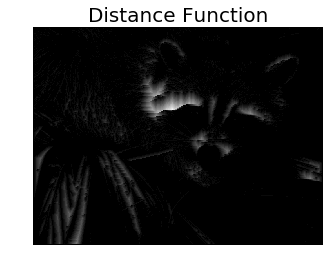

In [12]:
distance_function = create_distance_function(binary_image, structure_1, structure_2, radius)
plt.imshow(distance_function, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Distance Function', fontsize=20)
plt.show()